<font size=6  color=#003366> <b>[LEPL1109] - STATISTICS AND DATA SCIENCES</b> <br><br> 
<b>Hackathon 02 - Classification: Stars, Galaxies and Quasars </b> </font> <br><br><br>

<font size=5  color=#003366>
Prof. D. Hainaut<br>
Prof. L. Jacques<br>

<br><br>
Anne-Sophie Collin   (anne-sophie.collin@uclouvain.be)<br>
Guillaume Van Dessel (guillaume.vandessel@uclouvain.be)<br>
Jérome Eertmans (jerome.eertmans@uclouvain.be)<br>
Antoine Legat (antoine.legat@uclouvain.be)<br>
<div style="text-align: right"> Version 2023</div>

<br><br>
</font>

<font size=5 color=#009999> <b>GUIDELINES & DELIVERABLES</b> </font> <br>
-  This assignment is due on the <b>04 December 2023 at 22h00</b>.
-  Copying code or answers from other groups (or from the internet) is strictly forbidden. <b>Each source of inspiration (stack overflow, git, ChatGPT, other groups,...) must be clearly indicated!</b>
-  This notebook (with the "ipynb" extension) file, the report (PDF format) and all other files that are necessary to run your code must be delivered on <b>Moodle</b>.
- Only the PDF report will be graded on content and quality of the text / figures. <br><br>

<div class="alert alert-danger">
<b>[DELIVERABLE] Summary</b>  <br>
After the reading of this document (and playing with the code!), we expect you to provide us with:
<ol>
   <li> a PDF file (written in LaTeX, see example on Moodle) that answers all the questions below. The report should contain high quality figures with named axes (we recommend saving plots with the <samp>.pdf</samp> extension);
   <li> this Jupyter Notebook (it will not be read, just checked for plagiarism);
   <li> and all other files (not the datasets!) we would need to run your code.
</ol>
</div>



<br><font size=5 color=#009999> <b>CONTEXT & OBJECTIVE </b> </font> <br>
    

### Context

The classification scheme of galaxies, quasars, and stars is one of the most fundamental in astronomy. In this hackathon, we will investigate the classification of stars based on their spectral characteristics. The early cataloguing of stars and their distribution in the sky has led to the understanding that they make up our own galaxy and, following the distinction that Andromeda was a separate galaxy to our own, numerous galaxies began to be surveyed as more powerful telescopes were built. This datasat aims to classificate stars, galaxies, and quasars based on their spectral characteristics.

![](https://storage.googleapis.com/kaggle-datasets-images/1866141/3047436/9aaba4abadbffd3dcdb1e0fab8b75a6d/dataset-cover.jpg?t=2022-01-15-17-18-30)


### Objectives

The data consists of 100,000 observations of space taken by the SDSS (Sloan Digital Sky Survey). Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar. The project aims at building a ternary classifier for the following 3 classes: star, galaxy or quasar. 


### Notebook structure
This notebook is organized into four parts. Each of them assesses one fundamental step to solve our problem and provides one visualization tool to gain some understanding:
* PART 1 - DATA LOADING
   - 1.1 - Discover the dataset
   - Bonus: Visualization of alpha and delta 
   - 1.2 - Discard irrelevant features 
   - 1.3 - Split the dataset
    <br><br>
* PART 2 - EXPLORATORY DATA ANALYSIS 
   - 2.1 - Ternary targets
   - 2.2 - Correlation matrix
   - 2.3 - Data scaling and normalization
    <br><br>
* PART 3 - MODEL SELECTION
   - 3.1 - Precision, recall and F1-score
   - 3.2 - Model evaluation
   - 3.3 - Model selection and parameters tuning
   - 3.4 - Precision-Recall curve and thresholding
   <br><br>
* PART 4 - MODEL TESTING
   - 4.1 - Error computation on the test set


In [25]:
## warnings off
import warnings
warnings.filterwarnings("ignore")

<br><br><font size=7 color=#009999> <b>PART 1 - DATA LOADING</b> </font> <br>

<font size=4 color=#009999> <br> 1.1 - DISCOVER THE DATASET </font> <br>

**Import** `star_classification.csv` using `read_csv` [<sup>1</sup>](#fn1) from pandas and **obtain** a brief description of the data (size, variables type, missing values, etc.).  

<div class="alert alert-warning">
    <b>[Question 1.1]</b> Describe, briefly, your dataset (size, variables type, missing values, etc.).<br>
</div> 

In [26]:
"""
CELL N°1 : Import the dataset using pd.read_csv function 

@pre: filename 'star_classification.csv', located in the same folder as this jupyter
@post: variable `df` containing the dataframe
"""

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("star_classification.csv")
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


<font size=4 color=#009999> <br> BONUS - VISUALIZATION OF ALPHA AND DELTA </font> <br>

The `alpha` and `delta` features encodes the angular locations of the objects. Those locations can be projected on a celestial sphere, showing the distribution of objects in the sky. Purpose of the following cell is for visualization only. 


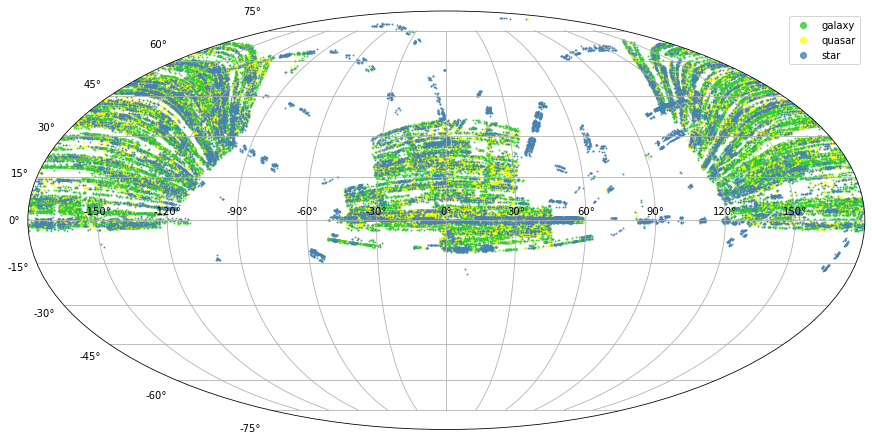

In [27]:
#!pip install astropy # Comment this line once the package has been installed

from astropy.coordinates import SkyCoord
import astropy.units as u

df_galaxy = df.loc[df['class']=='GALAXY']
df_quasar = df.loc[df['class']=='QSO']
df_star   = df.loc[df['class']=='STAR']

np.asarray(df_galaxy['alpha'])*u.degree

coords_galaxy = SkyCoord(ra=np.asarray(df_galaxy['alpha'])*u.degree, dec=df_galaxy['delta']*u.degree, frame='icrs', unit="deg")
coords_quasar = SkyCoord(ra=np.asarray(df_quasar['alpha'])*u.degree, dec=df_quasar['delta']*u.degree, frame='icrs', unit="deg")
coords_star   = SkyCoord(ra=np.asarray(df_star['alpha'])*u.degree, dec=df_star['delta']*u.degree, frame='icrs', unit="deg")

fig = plt.figure(figsize=(15,15))
ax  = fig.add_subplot(111, projection='mollweide')
ax.scatter(coords_galaxy.ra.wrap_at(180*u.degree).radian, coords_galaxy.dec.radian, 
               s=1, label='galaxy', color='limegreen', alpha=0.8)
ax.scatter(coords_quasar.ra.wrap_at(180*u.degree).radian, coords_quasar.dec.radian, 
               s=1, label='quasar', color='yellow', alpha=0.8)
ax.scatter(coords_star.ra.wrap_at(180*u.degree).radian, coords_star.dec.radian, 
               s=1, label='star', color='steelblue', alpha=0.8)
ax.legend(markerscale=6)
ax.grid()
plt.show()

<font size=4 color=#009999> <br> 1.2 - DISCARD IRRELEVANT FEATURES </font> <br>

It is usually hard to determine in adavace which features, or combination of features, will be the most relevant to perform the classification task. The rule of thumb is to **keep all the features** for which you have **doubts**. In some specific cases, however, it is possible to identify certain features that can make no contribution to the classification task. To do this, it is useful to observe the distribution of our observations for each feature. 

We therefore focus on identifying **features whose distribution cannot provide any relevant information** for classification. It is therefore a question of identifying them on the basis of a **numerical decision** and **not** on the basis of a decision linked to the **physical meaning** of the feature.

<div class="alert alert-warning">
    <b>[Question 1.2]</b> Based on a study of the features distribution (variance, number of unique values, number of missing values, etc.), can you identify some features that do not provide useful information for the classification task? Explain your analysis and remove those features from the dataset. <br>
</div> 

In [28]:
"""
CELL N°2 : Remove useless features

@pre: variable `df` containing the dataframe
@post: variable `df` containing the reduced dataframe
"""

filtered_df = df.drop(['class'], axis=1)
std_dev = filtered_df.std()
print("Feature's standart deviation:\n")
print(std_dev)
threshold = 2
low_variability_features = std_dev[std_dev < threshold].index.to_list()
print("\nFeatures with low variability (< 2): {}\n".format(low_variability_features))

print("Number of unique data:\n")
print(df.nunique())

print("\nChoice : We drop 'rerun_ID' and 'cam_col'\n")
df = df.drop(['rerun_ID'], axis=1)
df = df.drop(['cam_col'], axis=1)

Feature's standart deviation:

obj_ID         8.438560e+12
alpha          9.650224e+01
delta          1.964467e+01
u              3.176929e+01
g              3.175029e+01
r              1.854760e+00
i              1.757895e+00
z              3.172815e+01
run_ID         1.964765e+03
rerun_ID       0.000000e+00
cam_col        1.586912e+00
field_ID       1.490111e+02
spec_obj_ID    3.324016e+18
redshift       7.307073e-01
plate          2.952303e+03
MJD            1.808484e+03
fiber_ID       2.724984e+02
dtype: float64

Features with low variability (< 2): ['r', 'i', 'rerun_ID', 'cam_col', 'redshift']

Number of unique data:

obj_ID          78053
alpha           99999
delta           99999
u               93748
g               92651
r               91901
i               92019
z               92007
run_ID            430
rerun_ID            1
cam_col             6
field_ID          856
spec_obj_ID    100000
class               3
redshift        99295
plate            6284
MJD              

<font size=4 color=#009999> <br> 1.3 - SPLIT THE DATASET </font> <br> 

Data science projects begin by the division the **whole** dataset into a **training** and a **test** set. The subsequent analysis and decisions (i.e. features selection, pre-processing, model selection, etc.) are, then, conducted only on the _training set_ to stay statistically significant during the **testing phase**. The latter will, thus, only be conducted on the _test set_.  

We invite you then to **split** [<sup>2</sup>](#fn2) the dataset into a _training_ and a _test_. The proportion of each subset is at **your own discretion**.


<span id="fn2"> [2] N.B. Set the seed of your random split with `random_state = 42` to obtain reproducible results.</span>



<div class="alert alert-warning">
    <b>[Question 1.3]</b> What are the drawbacks (if any) of choosing a small test set (in proportion)? On the contrary, what are the consequences (if any) of a relatively large testing set (in proportion)? <br>
</div> 

In [29]:
"""
CELL N°3 : SPLIT THE DATASET    

@pre:  'df' a pandas frame with the entire dataset
@post: 2 pandas frames with the train and test sets
"""

import sklearn.model_selection as select

data_train, data_test = select.train_test_split(df, test_size=0.8, random_state = 42)
#test_size seems too high: test set = 80% data

<br>

<br><font size=7 color=#009999> <b>PART 2 - EXPLORATORY DATA ANALYSIS </b> </font> <br><br>

We conduct the analysis on the <i>training set</i>, avoiding therefore any modelling decision based on _unseen_ data (<i>test set</i>). In most cases, we assume that the distribution of this latter set stays similar to the <i>training set</i>.

<font size=4 color=#009999> <br> 2.1 - TERNARY TARGETS   </font> <br>

It's always useful to have an idea of the difficulty of the task in hand. More specifically, it is possible to determine a priori the expected **performance of a random classifier**. This constitutes the **baseline** that our model will logically have to beat. 

<div class="alert alert-warning">
    <b>[Question 2.1]</b> Are the ternary classes balanced? What are the proportions of data in each class? Briefly, justify your answer and add a visualization.
</div> 

<div class="alert alert-warning">
    <b>[Question 2.2]</b> What would be the expected performance of a random classifier on this dataset?
</div> 



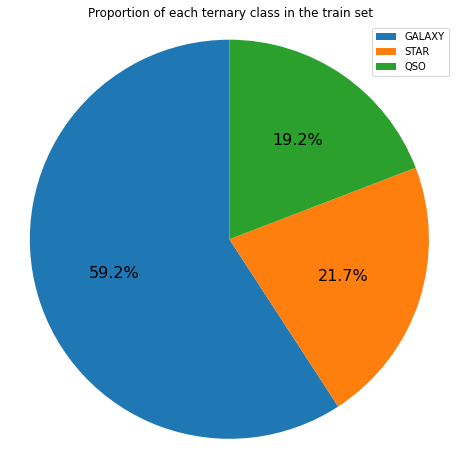

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,classes_ternary
count,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,1.237665e+18,176.655863,24.073995,22.093142,20.640065,19.654845,19.093582,18.775039,4502.178900,186.372800,5.799174e+18,0.579537,5150.591200,55596.743600,449.306850,0.599850
std,8.459954e+12,96.901785,19.589742,2.260195,2.047688,1.867191,1.771795,1.777343,1969.747109,148.299066,3.322762e+18,0.729884,2951.188942,1807.115776,272.254676,0.789469
min,1.237646e+18,0.011684,-17.613056,12.996640,10.730970,9.822070,9.469903,9.612333,109.000000,11.000000,2.995801e+17,-0.007352,266.000000,51608.000000,1.000000,0.000000
25%,1.237659e+18,126.857868,5.338535,20.367430,18.967128,18.170707,17.746183,17.483175,3187.000000,82.000000,2.865184e+18,0.052414,2544.750000,54243.000000,221.000000,0.000000
50%,1.237663e+18,180.164594,23.358027,22.212135,21.105605,20.133380,19.415625,19.011980,4192.000000,147.000000,5.638700e+18,0.428382,5008.000000,55889.000000,431.000000,0.000000
75%,1.237669e+18,233.399439,39.896809,23.723335,22.133282,21.055875,20.428103,19.932267,5362.000000,242.000000,8.337744e+18,0.713585,7405.250000,56780.000000,646.000000,1.000000
max,1.237681e+18,359.999031,82.288657,29.186370,27.072990,26.792650,30.163590,27.673360,8162.000000,940.000000,1.412675e+19,6.994351,12547.000000,58932.000000,1000.000000,2.000000


In [30]:
"""
CELL N°4 : TERNARY CLASSES :  proportion and ternarization

@pre:  Training dataframe  
@post: Proportion of each ternary class in this train set, a graph representing it, 
a modified training dataframe with a new column 'classes_ternary' continaining the ternary targets (0,1,2)
"""

proportion_pattern = data_train['class'].value_counts()

stars = proportion_pattern.index

labels_stars = list(stars)

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(proportion_pattern, autopct='%1.1f%%', textprops={'fontsize': 16}, startangle=90)
ax.axis('equal')
plt.title("Proportion of each ternary class in the train set")
plt.legend(labels_stars, loc="best")
plt.show()

data_train['classes_ternary'] = data_train['class'].map({'GALAXY':0, 'STAR':1, 'QSO':2})
data_train.describe()


<font size=4 color=#009999> <br> 2.2 - CORRELATION MATRIX </font> <br>

__Compute__ and __plot__ the correlation matrix. For the plot, you can use the function `imshow` or `matshow` from `matplotlib`.

<div class="alert alert-warning">
    <b>[Question 2.3]</b> Compute the correlation matrix of the dataset and plot it. Do you want to discard features based on this observation?  <br>
Write clearly you decision rule.                                                                                      
</div> 

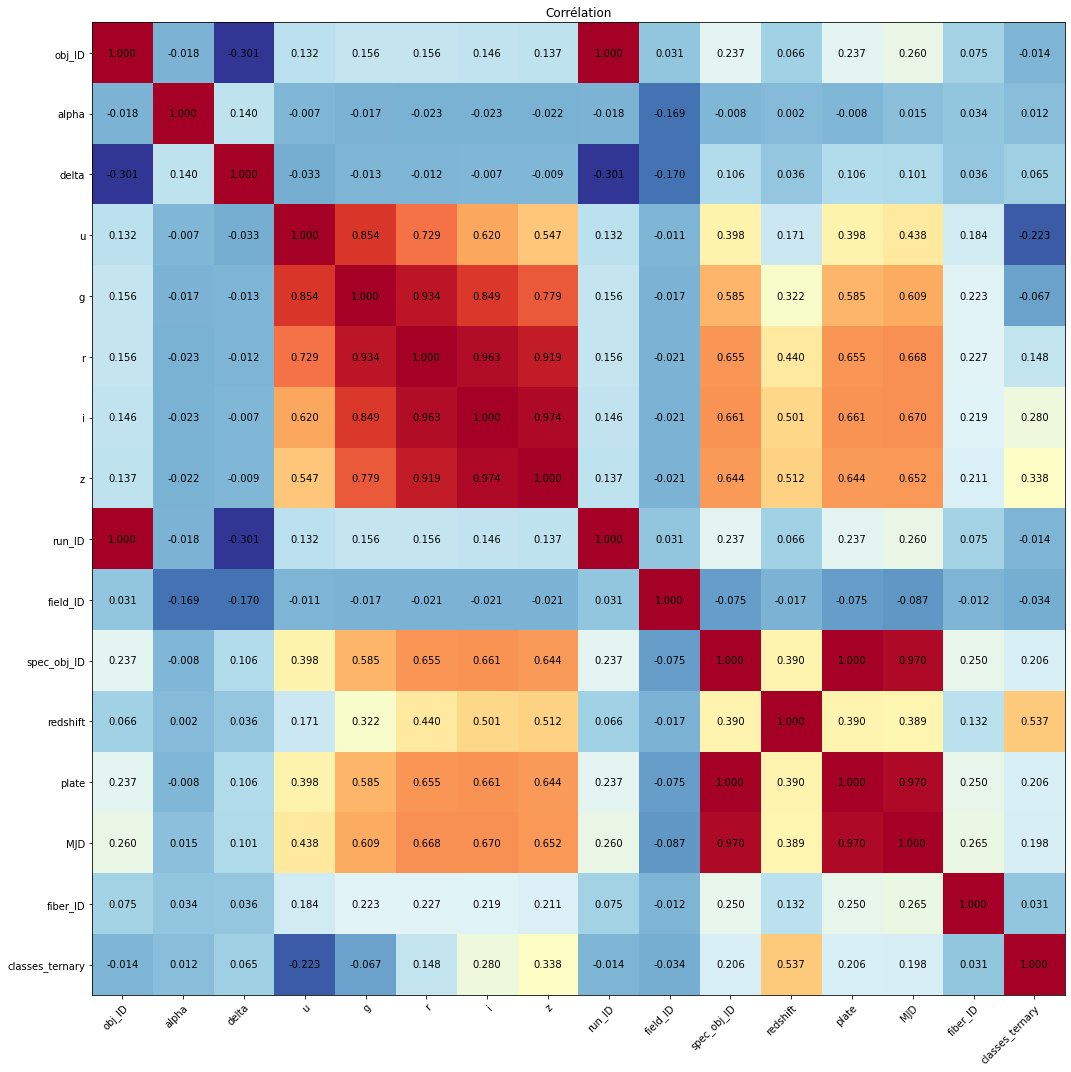

Data removed :['obj_ID' 'alpha' 'run_ID' 'field_ID' 'fiber_ID']


In [31]:
"""
CELL N°5 : CORRELATION MATRIX
   
@pre:  Training dataframe  
@post: The correlation matrix between the features (target incl.) and its plot    
"""
names_cat = np.array([label for label in data_train])
names_cat = names_cat['class' != names_cat]
N = data_train.shape[1] - 1
corr = (data_train.corr()).values

fig, ax = plt.subplots(figsize= (15, 15)) #plt.figure(figsize= [1000,1000])


im = ax.imshow(corr, cmap='RdYlBu_r') #cmap = 'RdYlBu_r' 'Reds' 'winter' 'Greys'

ax.set_xticks(np.arange(N), labels=names_cat)
ax.set_yticks(np.arange(N), labels=names_cat)


plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

for i in range(N):
    for j in range(N):
        text = ax.text(j, i, f"{corr[i][j]:.3f}", ha="center", va="center", color="k")

ax.set_title("Corrélation")
fig.tight_layout()
plt.show()

#Remove data with corrélation too small
treshold = .05
cat_out = names_cat[((np.abs(corr[-1])) < treshold)]
print("Data removed :" + str(cat_out))



<font size=4 color=#009999> <br> 2.3 - DATA SCALING AND NORMALIZATION</font> <br> 

__Split__ your _training_ and _test_ sets into their respective features set  (X)  and a ternary target variable (y). __Standardize__ the features sets. 


__Remark 1.__ The scaler object, used to scale the <i>training set</i>, should also be the one used on the <i>test set</i>! Again, do no reinvent the wheel!  


<div class="alert alert-warning">
    <b>[Question 2.4]</b>  Why do we scale data? Justify properly, whether it is necessary or not for your feature set (X) and which scaler did you use.
</div> 

In [32]:
"""
CELL N°6 : Data fill-in & scaling
   
@pre: train and test dataframes and the list 'feature_names' of columns to keep    
@post:  X_train: numpy array, with (scaled) selected features, containing training data
        X_test: numpy array, with (scaled) selected features, containing testing data. 
                The scaling should be done using the statistic of the train set.
"""

from sklearn.preprocessing import StandardScaler, MinMaxScaler


## Feature to discard (add some if necessary)
feature_names = np.append(cat_out, "class")
y_train = data_train["class"]
y_test = data_test["class"]
X_train       = data_train.drop(columns = np.append(feature_names, 'classes_ternary'))
X_test        = data_test.drop(columns = feature_names)
scaler = StandardScaler() #MinMaxScaler()
scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




<br>

<font size=4 color=#009999>  </font> <br>

<br><font size=7 color=#009999> <b>PART 3 - MODEL SELECTION </b> </font> <br><br>


Let us first build some tools that will help us to choose among our investigated models together with their (hyper-)parameters which one performs the best. 

<font size=4 color=#009999> <br> 3.1 - PRECISION, RECALL AND F1 SCORE </font> <br>

**Implement** the _precision, recall_ and _F-measure_ metrics based on the confusion matrix. Please follow the specifications in the provided template.  <br>

**Reminder**

$F_1$ is a performance score allowing to obtain some trade-off between the precision and recall criterions. It can be computed as follows:
$$F_1 = 2~\frac{\mathrm{precision} \cdot \mathrm{recall}}{\mathrm{precision} + \mathrm{recall}}.$$

Please consult, [Wikipedia](https://en.wikipedia.org/wiki/F-score) for further information about the metric.

**NOTE**: if ever the model you built would be terribly <i>bad</i>, with both precision's and recall's value equal to $0$, we suggest to return $0$ as $F_1$ score. 

In [33]:
"""
CELL N°7 : Implementation of precision, recall & F1 scores

@pre:  /  
@post: Follow the specifications to implement precision, recall and probas_to_F1 functions. 
"""
from sklearn.metrics import confusion_matrix

""" -----------------------------------------------------------------------------------------
Converts a vector of real probability values to a binary 0 or 1 
@pre: 
    - proba_vec: vector with real values representing each a probability
    - threshold : a threshold probability (between 0 and 1)
@post:
    - predicted_labels: binary prediction vector, with elements being 0 or 1.
----------------------------------------------------------------------------------------- """


def pred_probas_to_pred_labels(proba_vec, threshold=0.5):
    return np.where(proba_vec <= threshold, 0, 1)


""" -----------------------------------------------------------------------------------------
Based on the confusion matrix, computes the 'precision'
@pre: 
    - cm : confusion_matrix of a binary classification
@post:
    - score: precision (or positive predictive value), associated with cm
----------------------------------------------------------------------------------------- """


def precision(cm):
    #True positives over Perceived positives
    return cm[1,1]/(cm[0,1] + cm[1,1])


""" -----------------------------------------------------------------------------------------
Based on the confusion matrix, computes the 'recall'
@pre: 
    - cm : confusion_matrix of a binary classification  
@post:
    - r: recall (or true positive rate), associated with cm
----------------------------------------------------------------------------------------- """


def recall(cm):
    return cm[1,1]/(cm[1,1] + cm[1,0])


""" -----------------------------------------------------------------------------------------
Evaluates the F1 score which is a harmonic mean of the precision and recall
@pre: 
    - y_true: vectors of 0 and 1 representing the real class values
    - y_pred: vectors of real values representing predicted probability
    - output:  'F1' means that the output should only be the F1 score. 
               'PRF1' means that the output is a tuple with (precision, recall, F1)
               'F1' is the default value
    - threshold: a threshold probability (between 0 and 1) 
@post:
    - F1_score: harmonic mean of the precision and recall
    - If asked in argument, precision and recall can be added in the output: (precision, recall, F1)
----------------------------------------------------------------------------------------- """


def probas_to_F1(y_true, y_pred, output="F1", threshold=0.5):

    y_pred = pred_probas_to_pred_labels(y_pred, threshold)
    cm = confusion_matrix(y_true, y_pred)
    prec = precision(cm)
    rec = recall(cm)
    if prec == 0 and rec == 0 :
        F1_score = 0
    else :
        F1_score = 2 * prec * rec / (rec + prec)
    if output == 'F1' :
        return F1_score
    elif output == 'PRF1' :
        return (prec, rec, F1_score)
    else :
        raise ValueError("Output attribute must be 'F1' or 'PRF1'.")

<font size=4 color=#009999> <br> 3.2 - MODEL EVALUATION  </font> <br>

**Implement** `evalParam`, which evaluates, using a __k-fold__ cross-validation, a list of `scikit-learn` models. Use your method `probas_to_F1` as score function. The function `evalParam` must be  **scalable**. Put differently, it must handle $m$ methods, and a variable list of their possible parameters configuration. 


In addition of the list of _models_ (methods) and their list of _hyperparameters_ (param), the function takes as arguments the _features set_ (X), _target variable_ (y) and _the number of folds_ (cv). 

It returns an array _score_ such that <br>

$$score[i][j] = average F1 over the folds, using method _i_ with parameters configuration j.$$

To help you, here is a pseudo code of K-fold for one method and one configuration of hyperparameters. 

<img src="K-fold_pseudo-code.png" width = "650">
 
__Remark 1.__ You have to implement a K-fold cross-validation. You are only allowed to use `KFold.splits(dataset)` from `sklearn.model_selection` to generate the indices of your different folds. 


<div class="alert alert-warning">
    <b>[Question 3.1]</b>
    Explain the idea of K-fold cross-validation and why it is useful. How the choice of K (in the cross-validation) impacts the bias and the variance of the scores obtained on the different folds? Choose and justify the number of folds you consider in this project. 
</div> 

In [34]:
"""
CELL N°8 : Evaluates the methods using different parameters via a K-folds with cv folds

@pre: 
    - methods: list of classifiers to analyze
    - param: list of size len(methods) containing lists of parameters (in dictionary form) to evaluate.
             In other words, param[i][j] is a dictionary of parameters.
             For example if index i is for KNN, we can have a parameter configuration (with index j) described as
                 param[i][j] = {"n_neigbors":5, "weights": 'uniform'}; 
                 while param[i] is a list of such parameters dictionnaries for model i (here KNN)
    - X: training dataset
    - y: target vector for the corresponding entries of X
    - cv: the number of folds to use in your cross-validation
@post:
    - score: list with same shape as param. score[i][j] = mean score over the folds, 
                                                         using method i with parameters param[i][j]
------------------------------------------------------------------------------------------------ """
from sklearn.model_selection import KFold


def evalParam(methods, param, X, y, cv):

    return score

<font size=4 color=#009999> <br> 3.3 - MODEL SELECTION AND PARAMETERS TUNING </font> <br>

__Run__ your function `evalParam` to evaluate the three following models : [_linear regression_](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression), [_logistic regression_](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) and [_K nearest neighbors_](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). <br>These models are already implemented in sklearn. <br>

**Study** the effect of the following hyperparameters:
- `n_neighbors` in KNN (try selected values between 1 and 100),
- `weights` in KNN (try both values 'uniform' and 'distance')
- `p` in KNN (try euclidean (p=2), manhattan (p=1) and minkowski-100 (more or less equivalent to max-norm))
- `C` in logistic regression (try selected values between $10^{-3}$ and $10^3$)</li>


<div class="alert alert-warning">
    <b>[Question you should ask yourself]</b> (Not graded) Prior to the run, discuss the fitness of each model to answer to our problem. 
</div> 

<div class="alert alert-warning">
    <b>[Question 3.2]</b> Explain your methodology of model evaluation. More precisely, explain which hyperparameters you tune and the values you test for each of them. Next, provide the best hyperparameters configuration for each of the three models as well as their CV F1 score.
</div>


In [35]:
"""
CELL N°9 : Model selection - tuning the three methods
   
@pre: evalParam function correctly implemented    
@post:  three models (knn, linear and logistic regression) initialized with tuned hyperparameters.
        print the best hyperparameters found, as well as their CV F1 scores associated with these hyperparameters.
------------------------------------------------------------------------------------------------ """

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


print(' ')




<div class="alert alert-warning">
    <b>[Question 3.3]</b> Based on your answers to previous questions, select a final model that you will keep as classifier. Justify.
</div> 

<font size=4 color=#009999> <br> 3.4 - PRECISION, RECALL AND THRESHOLDING  </font> <br>

In general, the classifying models compute first the **probability** for a point to belong to a certain class. Next, they apply a **threshold** to assign the final label (star, galaxy or quasar). By default, `scikit-learn` applies a threshold of 0.5 for KNN and logistic regression. You can use the function `predict_proba` to obtain the original probabilities. <br>
For analyzing the impact of the threshold on the precision and recall of a model on binary classification, we generally plot its **precision-recall curve**. Specific functions in sklearn help doing that plot (see [sklearn documentation](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html)). <br>

In order to extend the precision-recall curve our **multi-class** problem, it is necessary to binarize the output. For example, for class `star`, the binarization of the output `(galaxy, star, star, quasar, galaxy, star, quasar)` is `(0,1,1,0,0,1,0)`. We then consider the classification of the `star` vs all other classes. Then, we repeat the process to produce the classification of `galaxy` vs all and `quasar` vs all. 
For each of the three classes: binarize the output, train your model on the binarized output, make a binary prediction and plot its precision-recall curve for the three methods, on the same figure. There should be one figure for each class, with the precision-recall curve for the three methods on each figure.<br>

<div class="alert alert-warning">
    <b>[Question 3.4]</b> Plot the precision-recall curve for the three methods, one figure for each class. What happens to the precision and recall when the threshold tends to 0? And when it tends to 1? Explain and, if possible, establish a link with Question 2.1.<br>
    For each class, for each method: what threshold would you use?
</div>


In [36]:
"""
TEST CELL N°10 : PRECISION-RECALL CURVES
   
@pre: the three models (knn, linear and logistic regression) initialized with their tuned hyperparameters.  
@post: a figure with the precision-recall curves for the three given models and also for a simple baseline classifier, 
        applied on a validation set containing 10% of the training set.
------------------------------------------------------------------------------------------------ """

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

# Validation set to use for the PR curves
X_train2, X_val = train_test_split(X_train, test_size=0.1, random_state=42)
y_train2, y_val = train_test_split(y_ternary_train, test_size=0.1, random_state=42)

# Binarization of the output
y_train2_bin = label_binarize(y_train2, classes=[0, 1, 2])
y_val_bin    = label_binarize(y_val, classes=[0, 1, 2])
n_classes    = y_val_bin.shape[1]



NameError: name 'y_ternary_train' is not defined

<br>

<br><font size=7 color=#009999> <b>PART 4 - MODEL TESTING </b> </font> <br><br>

<div class="alert alert-warning">
    <b>[Question 4.1]</b> Use the test set to estimate the precision, recall and F1 score of your final model and validate its performance on unseen data. <br> Observe if the scores are similar to the ones estimated with your cross-validation.
        Are you satisfied by the performance of your classifier, in view of the task for which it will be used?

</div> 


In [ ]:
"""
CELL N°11 : MODEL TESTING
   
@pre:   clf is your selected classifier
        X_test is the numpy array containing the test set (with your selected features)
        y_test is the numpy array contaning your binary target vector
@post:  print the F1, precision and recall on the test set.
------------------------------------------------------------------------------------------------ """

